# **Classifying rock, paper and scissors images using ResNets, Regularization and Data Augmentation in PyTorch**

## **Data download and description**
The dataset has been downloaded from Kaggle Dataset. This dataset contains images of hand gestures from the Rock-Paper-Scissors game. 
The dataset contains a total of 2188 images corresponding to the 'Rock' (726 images), 'Paper' (710 images) and 'Scissors' (752 images) hand gestures of the Rock-Paper-Scissors game.
All images are RGB images of 300 pixels wide by 200 pixels high in .png format. The images are separated in three sub-folders named 'rock', 'paper' and 'scissors' according to their respective class.

In [8]:
!pip install jovian --upgrade --quiet

In [9]:
project_name = 'final-project-zero-to-gnas-rockpaperscissors'

In [10]:
!pip install opendatasets --upgrade --quiet

In [11]:
import os
import torch
import torchvision
from torch.utils.data import random_split
import opendatasets as od

In [12]:
od.download('https://www.kaggle.com/drgfreeman/rockpaperscissors/download')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nayanakamtekar
Your Kaggle Key: ··········


  3%|▎         | 9.00M/306M [00:00<00:04, 72.9MB/s]

100%|██████████| 306M/306M [00:02<00:00, 158MB/s]


Datasets are dowloaded from kaggle (use your username and key to download). The contains 3 folders `paper`, `rock` and `scissors`. Lets verify this

In [13]:
data_dir = './rockpaperscissors/rps-cv-images'

print(os.listdir(data_dir))
classes = os.listdir(data_dir)
print(classes)

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']
['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']


Lets look inside `paper`folder

In [14]:
paper_files = os.listdir(data_dir + "/paper")
print('No. of training examples for paper:', len(paper_files))
print(paper_files[:5])

No. of training examples for paper: 712
['n5NXfZTRonR4iOr0.png', 'hWVwQVI74lc5zgyK.png', 'X3iDu3E3UCW1w1Cd.png', 'tlZ31lJJt1OhSr0a.png', '0RA9rcrv8iVvuDDU.png']


The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the ImageFolder class from torchvision to load the data as PyTorch tensors.

In [15]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

We can create dataset using the ImageFolder class from torchvision. In addition to the ToTensor transform, we'll also apply some other transforms to the images. There are a few important changes we'll make while creating PyTorch datasets for training and validation:

**Resizing the image**: The images in the dataset are of varying sizes with 3 channels. We have resized the image to 64 X 64 pixels.

In [16]:
tfms = transforms.Compose([
        transforms.Resize([64, 64]),
        transforms.ToTensor(),
])
dataset = ImageFolder(data_dir, transform=tfms)

## **Image shape and Tensor**

In [17]:
img, label = dataset[20]
print(img.shape, label)
img

torch.Size([3, 64, 64]) 0


tensor([[[0.0706, 0.0784, 0.0902,  ..., 0.0706, 0.0588, 0.0392],
         [0.0745, 0.0824, 0.0941,  ..., 0.0667, 0.0471, 0.0314],
         [0.0784, 0.0902, 0.0980,  ..., 0.0510, 0.0353, 0.0235],
         ...,
         [0.0980, 0.1020, 0.0980,  ..., 0.0745, 0.0706, 0.0667],
         [0.0980, 0.1020, 0.0980,  ..., 0.0745, 0.0706, 0.0627],
         [0.0980, 0.0980, 0.0980,  ..., 0.0745, 0.0667, 0.0588]],

        [[0.4235, 0.4392, 0.4588,  ..., 0.3686, 0.3412, 0.3098],
         [0.4353, 0.4471, 0.4667,  ..., 0.3490, 0.3176, 0.2863],
         [0.4392, 0.4588, 0.4784,  ..., 0.3216, 0.2902, 0.2627],
         ...,
         [0.4784, 0.4824, 0.4863,  ..., 0.4039, 0.3961, 0.3843],
         [0.4745, 0.4745, 0.4824,  ..., 0.4000, 0.3882, 0.3804],
         [0.4667, 0.4706, 0.4784,  ..., 0.3961, 0.3843, 0.3765]],

        [[0.0863, 0.0941, 0.1098,  ..., 0.0549, 0.0314, 0.0039],
         [0.0902, 0.1020, 0.1098,  ..., 0.0431, 0.0157, 0.0000],
         [0.0941, 0.1059, 0.1137,  ..., 0.0235, 0.0039, 0.

In [18]:
print(dataset.classes)

['paper', 'rock', 'scissors']


## **Examples of transformed images**

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [20]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  paper (0)


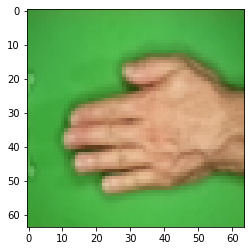

In [21]:
show_example(*dataset[0])

In [22]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/nayanakamtekar/final-project-zero-to-gnas-rockpaperscissors


'https://jovian.ai/nayanakamtekar/final-project-zero-to-gnas-rockpaperscissors'

## **Split dataset for training, validation and test**

Set a random seed so that the random split of dataset will be the same over future runs of the program

In [23]:
random_seed = 50
torch.manual_seed(random_seed);

Use 10% of data for test and 5% data for validation. The remaining data (85%) is used data training set

In [24]:
test_pct = 0.1
val_pct = 0.05
test_size = int(len(dataset)*test_pct)
val_size = int(len(dataset)*val_pct)
train_size = len(dataset) - test_size - val_size

train_ds, test_ds, val_ds = random_split(dataset, [train_size, test_size, val_size])
len(train_ds), len(test_ds), len(val_ds)

(1861, 218, 109)

Next, we can create data loaders for retrieving images in batches.We can now create data loaders for training, validation and test, to load the data in batches

In [25]:
from torch.utils.data.dataloader import DataLoader

batch_size=64

In [26]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

## **Exploring training datasets**

We can look at batches of images from the dataset using the make_grid method from torchvision. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

In [27]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

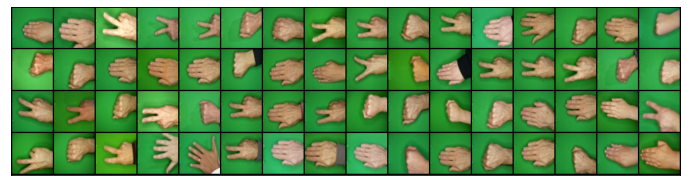

In [28]:
show_batch(train_dl)

In [29]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/nayanakamtekar/final-project-zero-to-gnas-rockpaperscissors


'https://jovian.ai/nayanakamtekar/final-project-zero-to-gnas-rockpaperscissors'

## **Model with Residual Blocks and Batch Normalization**

One of the key changes to our CNN model this time is the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers.

![](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

We will use the ResNet9 architecture, as described [in this blog series:](https://jovian.ai/outlink?url=https%3A%2F%2Fwww.myrtle.ai%2F2018%2F09%2F24%2Fhow_to_train_your_resnet%2F)

![](https://github.com/lambdal/cifar10-fast/raw/master/net.svg?sanitize=true)

In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [32]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class RockPaperScissorsModel(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64, pool=True)    # 64 x 32 x 32
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 16 x 16
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) # 128 x 16 x 16
        
        self.conv3 = conv_block(128, 256, pool=True) # 256 x 8 x 8
        self.conv4 = conv_block(256, 512, pool=True) # 512 X 4 x 4
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) # 512 x 4 x 4
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [33]:
model = RockPaperScissorsModel(3, 10)
model

RockPaperScissorsModel(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNor

Let's verify that the model produces the expected output on a batch of training data. The 10 outputs for each image can be interpreted as probabilities for the 10 target classes (after applying softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image.

In [34]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([64, 3, 64, 64])
out.shape: torch.Size([64, 10])
out[0]: tensor([ 1.6293,  1.5814, -3.7492, -0.2336, -0.7361,  0.2876, -3.0150, -3.0018,
         1.3478, -1.5967], grad_fn=<SelectBackward>)


To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class DeviceDataLoader to move our model & data to the GPU as required.

In [35]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu'`)) or a GPU (`torch.device('cuda')`)

In [36]:
device = get_default_device()
device

device(type='cuda')

In [37]:
train_dl = DeviceDataLoader(train_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [38]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/nayanakamtekar/final-project-zero-to-gnas-rockpaperscissors


'https://jovian.ai/nayanakamtekar/final-project-zero-to-gnas-rockpaperscissors'

## **Training the model**
Before we train the model, we're going to make a bunch of small but important improvements to our `fit` function:

* **Learning rate scheduling:** Instead of using a fixed learning rate, we 
will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we'll use is called the "One Cycle Learning Rate Policy", which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs. Learn more: https://sgugger.github.io/the-1cycle-policy.html

* **Weight decay:** We also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.Learn more: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab

* **Gradient clipping:** Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping. Learn more: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48

Let's define a `fit_one_cycle` function to incorporate these changes. We'll also record the learning rate used for each batch.

In [39]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

    
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()
            lrs.append(get_lr(optimizer))
            sched.step()
            
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [40]:
history = [evaluate(model, val_dl)]
history

[{'val_acc': 0.0, 'val_loss': 2.288458824157715}]

In [41]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [42]:
%%time
history = []
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], train_loss: 0.4556, val_loss: 0.1166, val_acc: 0.9817
Epoch [1], train_loss: 0.0379, val_loss: 0.0403, val_acc: 0.9817
CPU times: user 1.16 s, sys: 620 ms, total: 1.78 s
Wall time: 8.91 s


In [43]:
train_time='00:08.32'

Our model trained to over 90% accuracy in under 10 minutes!

## **Testing with individual images**

Let's define a helper function predict_image, which returns the predicted label for a single image tensor.

In [44]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: paper , Predicted: paper


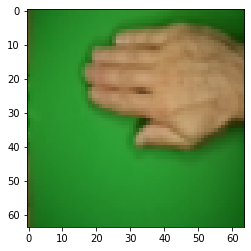

In [45]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: paper , Predicted: paper


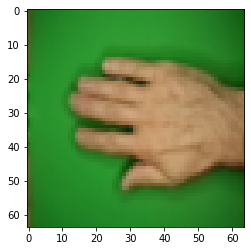

In [46]:
img, label = test_ds[75]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [47]:
result = evaluate(model, test_dl)
result

{'val_acc': 1.0, 'val_loss': 0.0032071340829133987}

In [48]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


## **Saving and loading the model**

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [49]:
torch.save(model.state_dict(), 'rockpaperscissor-resnet.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the `.load_state_dict` method.

In [50]:
model2 = to_device(RockPaperScissorsModel(3,10), device)

In [51]:
model2.load_state_dict(torch.load('rockpaperscissor-resnet.pth'))

<All keys matched successfully>

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [52]:
evaluate(model2, test_dl)

{'val_acc': 1.0, 'val_loss': 0.0032071340829133987}

In [53]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [54]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time=train_time)

[jovian] Metrics logged.


In [55]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/nayanakamtekar/final-project-zero-to-gnas-rockpaperscissors


'https://jovian.ai/nayanakamtekar/final-project-zero-to-gnas-rockpaperscissors'